# Problem Statment  : AllLife Credit Card Customer Segmentation

### Obective
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Background
AllLife Bank wants to focus on its credit card customer base in the next financial year.They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

### Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

## Data Description

Dataset includes data of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

1. Customer key - Identifier for the customer
2. Average Credit Limit - Average credit limit across all the credit cards
3. Total credit cards - Total number of credit cards
4. Total visits bank - Total number of bank visits
5. Total visits online - total number of online visits
6. Total calls made - Total number of calls made by the customer

## Steps and Tasks:

1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)


2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)


3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)


4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)


5. Calculate average silhouette score for both methods. (5 marks)


6. Compare K-means clusters with Hierarchical clusters. (5 marks)


7. Analysis the clusters formed, tell us how is one cluster different from another and answer allthe key questions. (10 marks)

## Steps 
1. Data loading and preprocessing
2. Exploratory Data Analysis
3. K-Mean Clustering and cluster Analysis
4. Hierarchical clustering and cluster Analysis
5. Compare Models by comparing silhouette score and other performance indices.

### Data loading and preprocessing

####  Import Pandas, Numpy, pyplot and seaborn

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")           # Not always recommended, but jsut so our notebook looks clean for this activity

#### Import the dataframes "Credit Card Customer Data.xlsx" 

In [2]:
df1 = pd.read_excel("C:\\MyData\\AIML\\Dataset\\Credit Card Customer Data.xlsx")
df1.shape

(660, 7)

In [3]:
df1.head(10)

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   
5      6         58634             20000                   3   
6      7         48370            100000                   5   
7      8         37376             15000                   3   
8      9         82490              5000                   2   
9     10         44770              3000                   4   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  
5                  0                    1                 8  
6                  0                   11                 2  
7                  0                    1                 1  
8                  0                    2                 2  
9                  0                    1                 7

### Exploratory Data Analysis

Exploratory Data Analysis using Pandas Profiling, this provides complete univarate analysis and limited bivariate analysis.

In [4]:
from pandas_profiling import ProfileReport         # Exploratory Data analysis can be done using Pandas Profiling
design_report = ProfileReport(df1)
design_report.to_file(output_file='report.html')
df1.profile_report()

######  EDA : Pandas Profiling Report Analysis 
    1. Dataset has 660 entries with 7 variables (attributes)
    2. Serial Number & Customer Key are unique for each customer, should be dropped
    3. Dataset has No dupliacte or missing, null values
    4. Understanding Zero's 
       - 15.2% customer has no visit to bank 
       - 21.8% customer didn't use online service 
       - No calls were made to 14.7% customers
           
    5. Customer with low online login visited Branch more frequently. 
    6. Frequent calls made by customer who has 5 visit or 5 online login.
    7. Customer has more Credit Cards call to bank less frequently.
    8. Credit limit and Bank visit has no corelation, while credit limit has storng relation with online visit

In [5]:
##Remove SI_No & Customer Key since it unique identifer
df1.drop(columns = {'Sl_No','Customer Key'}, inplace=True)

### 1. Univariate Analysis

In [6]:
df1.head().round(2)                     # check the first five entries in data frame, Round the values to 2 decimal Points

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made  
0                    1                 0  
1                   10                 9  
2                    3                 4  
3                    1                 4  
4                   12                 3

In [7]:
df1.describe().round(2).T

count      mean       std     min      25%      50%  \
Avg_Credit_Limit     660.0  34574.24  37625.49  3000.0  10000.0  18000.0   
Total_Credit_Cards   660.0      4.71      2.17     1.0      3.0      5.0   
Total_visits_bank    660.0      2.40      1.63     0.0      1.0      2.0   
Total_visits_online  660.0      2.61      2.94     0.0      1.0      2.0   
Total_calls_made     660.0      3.58      2.87     0.0      1.0      3.0   

                         75%       max  
Avg_Credit_Limit     48000.0  200000.0  
Total_Credit_Cards       6.0      10.0  
Total_visits_bank        4.0       5.0  
Total_visits_online      4.0      15.0  
Total_calls_made         5.0      10.0

1. Customer has average Credit limit in range of 3,000 to 200,000, while 75% customer has limit 48,000 or less.
2. Customers has multiple credit cards in range of 1 to 10, majority of customers has 5 or more credit cards
3. Customer has 5 visits to bank, average 2.4 vitis per customer
4. Customers has ~ 3 online login, majority of customer use online less frequently. 
5. 75% customers called bank less than 5 times in years, Average more than 3 calls made by csutomers

#### This shows contcating bank over phone is preffered by customer compared to visitng Branch or using online service

### 2. Bivariate Analysis

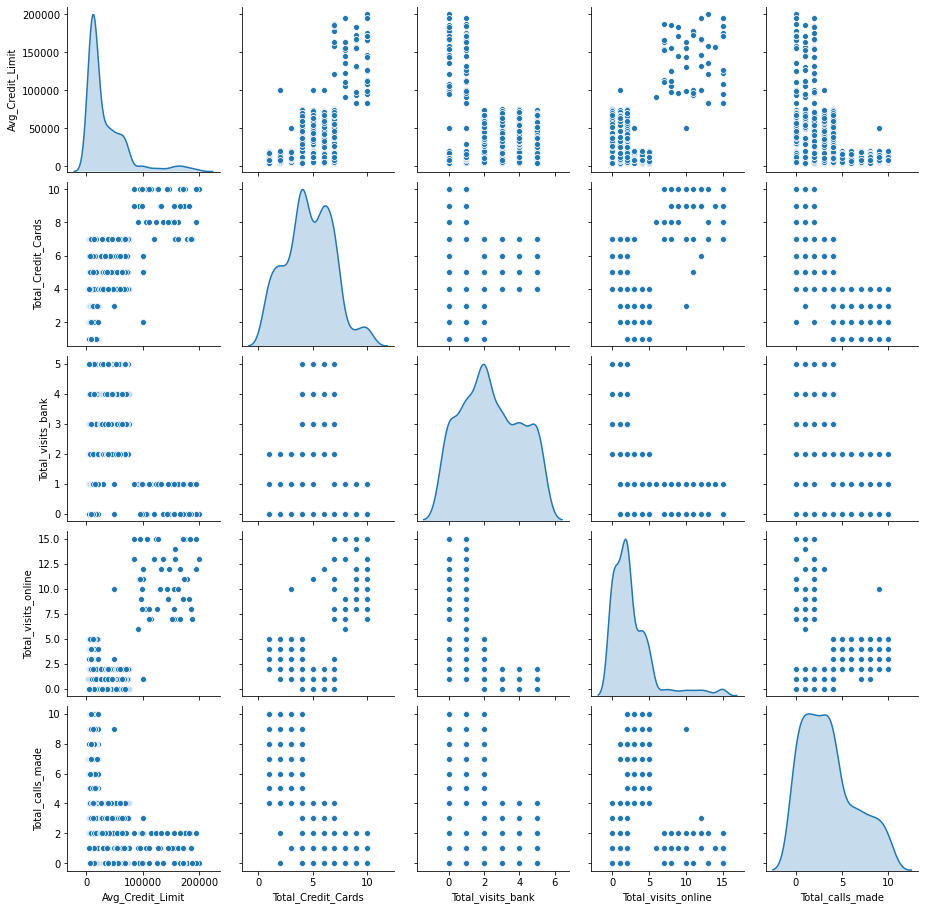

In [8]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(df1 , diag_kind = 'kde')
plt.show()

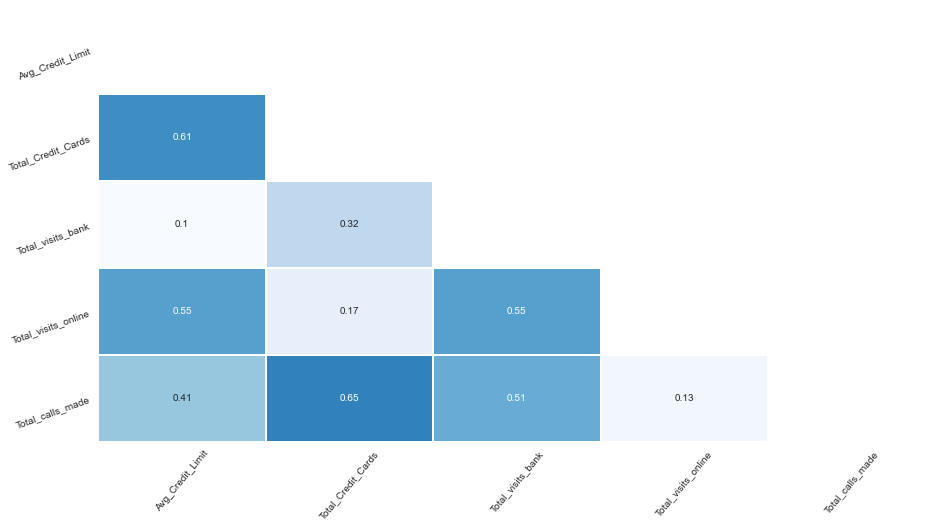

In [9]:
corr = abs(df1.corr())                        # correlation matrix
lower_triangle = np.tril(corr, k = -1)        # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0                    # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))                  # setting the figure size
sns.set_style(style = 'white')                # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Do Heatmap
plt.xticks(rotation = 50)                     # Aesthetic purposes
plt.yticks(rotation = 20)                     # Aesthetic purposes
plt.show()

In [10]:
df1.skew()

Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

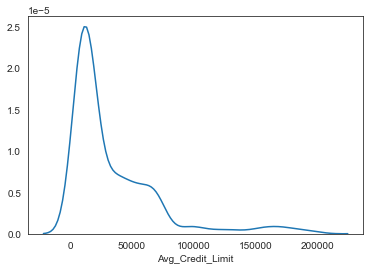

In [11]:
# Distplot of Avrage Credit Limit
sns.distplot(df1['Avg_Credit_Limit'],hist=False)
plt.show()

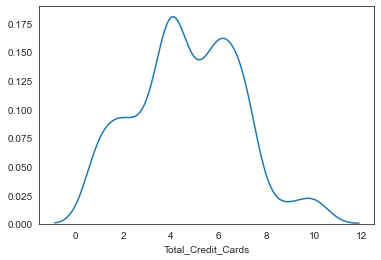

In [12]:
# Distplot of Credit Cards Count
sns.distplot(df1['Total_Credit_Cards'],hist=False)
plt.show()

1.  Average Credit Limit is highly skewed, in range of 3000 to 200000, on logrithmic scale show 3 Peaks indicate 3 cluster
2. Analysis of Total Credit Card count indicate customers are segmented in 4 clusters. 
###### Analysing the various distplot of attributes indicates customer segmented in 3 or 4 clusters

### 3. K-means Clustering

K- Means clustering is Centroid based clustering. The objective is to find K clusters/groups. The way these groups are
defined is by creating a centroid for each group. The centroids are like the heart of the cluster, they “capture” the points closest to them and add them to the cluster.
• Large K produces smaller groups and a small K produces larger groups
• K-Means uses Eucledian distances and is the most popular


    1. Import library from skleran
    2. Scale (convert the data to same scale) using Z-Score
    3. Run the Kmeans Modelling using K = 1 to 10 and see the distoration 
    4. Plot the ditroation against number of clusters 
    5. Use elbow method to find the optimal number of clusters
    6. Run the model using Kmeans k = and check the model performance (centroids)
    7. Add the column to original dataset with predicted cluster label
    8. Boxplot the dataframe to analyse model performance.

In [13]:
## Import KMeans clustring model, and other related libraries

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn import metrics

In [14]:
##Scale the data using Z-score

from scipy.stats import zscore

df1_z = df1.apply(zscore)
df1_z.head()                                  # Verify the values scaled

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.740187           -1.249225          -0.860451   
1          0.410293           -0.787585          -1.473731   
2          0.410293            1.058973          -0.860451   
3         -0.121665            0.135694          -0.860451   
4          1.740187            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  
0            -0.547490         -1.251537  
1             2.520519          1.891859  
2             0.134290          0.145528  
3            -0.547490          0.145528  
4             3.202298         -0.203739

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

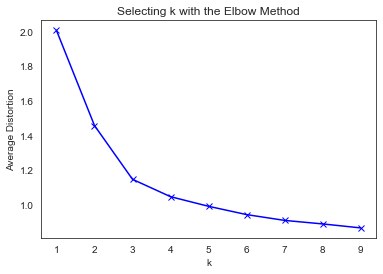

In [15]:
## Finding optimal no. of clusters using elbow Method

from scipy.spatial.distance import cdist

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df1_z)
    prediction=model.predict(df1_z)
    meanDistortions.append(sum(np.min(cdist(df1_z, model.cluster_centers_, 'euclidean'), axis=1)) / df1_z.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method')

##### Analysis of Plot by elbow method indicates data segmented in 3 clusters

#### 3.2 Use the k-means clustering with k = 3 and fit the scaled data

In [16]:
# fit the Data using Kmeans clustering with k value = 3
KMC = KMeans(n_clusters=3, n_init = 15, random_state=2345)
KMC.fit(df1_z)      

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [17]:
# Make the Dataframe of clusters with centroid for each colum 
centroids = KMC.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df1_z) )
centroid_df                           # Print Centroids of cluster for each attribute

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.595796           -1.059623          -0.901518   
1         -0.021062            0.373690           0.666395   
2          2.831764            1.862226          -1.105763   

   Total_visits_online  Total_calls_made  
0             0.322997          1.148109  
1            -0.553672         -0.553005  
2             2.827319         -0.874330

In [18]:
KMC_labeled=df1.copy()
KMC_labeled['KMC-labels'] = KMC.labels_
KMC_labeled.head(10)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   
5             20000                   3                  0   
6            100000                   5                  0   
7             15000                   3                  0   
8              5000                   2                  0   
9              3000                   4                  0   

   Total_visits_online  Total_calls_made  KMC-labels  
0                    1                 0           1  
1                   10                 9           0  
2                    3                 4           1  
3                    1                 4           1  
4                   12                 3           2  
5                    1                 8           0  
6                   11                 2           2  
7                    1                 1           0  
8                    2                 2           0  
9                    1                 7           0

In [19]:
# Add the cluster label to categories Standatd,Gold,Premium

KMC_labeled['KMC-labels']=KMC_labeled['KMC-labels'].astype(str)
KMC_labeled['KMC-labels'].replace({"0": "Standard", "1": "Gold", "2": "Premium"}, inplace=True)
KMC_labeled.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made KMC-labels  
0                    1                 0       Gold  
1                   10                 9   Standard  
2                    3                 4       Gold  
3                    1                 4       Gold  
4                   12                 3    Premium

In [20]:
# check the Number of enteries in each cluster 
KMC_labeled.groupby(["KMC-labels"]).count()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
KMC-labels                                                            
Gold                     386                 386                386   
Premium                   50                  50                 50   
Standard                 224                 224                224   

            Total_visits_online  Total_calls_made  
KMC-labels                                         
Gold                        386               386  
Premium                      50                50  
Standard                    224               224

In [21]:
# check the Number of enteries in each cluster 
KMC_labeled.groupby(["KMC-labels"]).mean().round(0)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
KMC-labels                                                            
Gold                 33782.0                 6.0                3.0   
Premium             141040.0                 9.0                1.0   
Standard             12174.0                 2.0                1.0   

            Total_visits_online  Total_calls_made  
KMC-labels                                         
Gold                        1.0               2.0  
Premium                    11.0               1.0  
Standard                    4.0               7.0

In [22]:
# check the Number of enteries in each cluster 
KMC_labeled.groupby(["KMC-labels"]).max().round(0)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
KMC-labels                                                            
Gold                  100000                   7                  5   
Premium               200000                  10                  1   
Standard               50000                   4                  2   

            Total_visits_online  Total_calls_made  
KMC-labels                                         
Gold                          3                 4  
Premium                      15                 3  
Standard                     10                10

##### 3.3 Make the Boxplot of dataset by each cluster for analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E307112E0>,
      dtype=object)

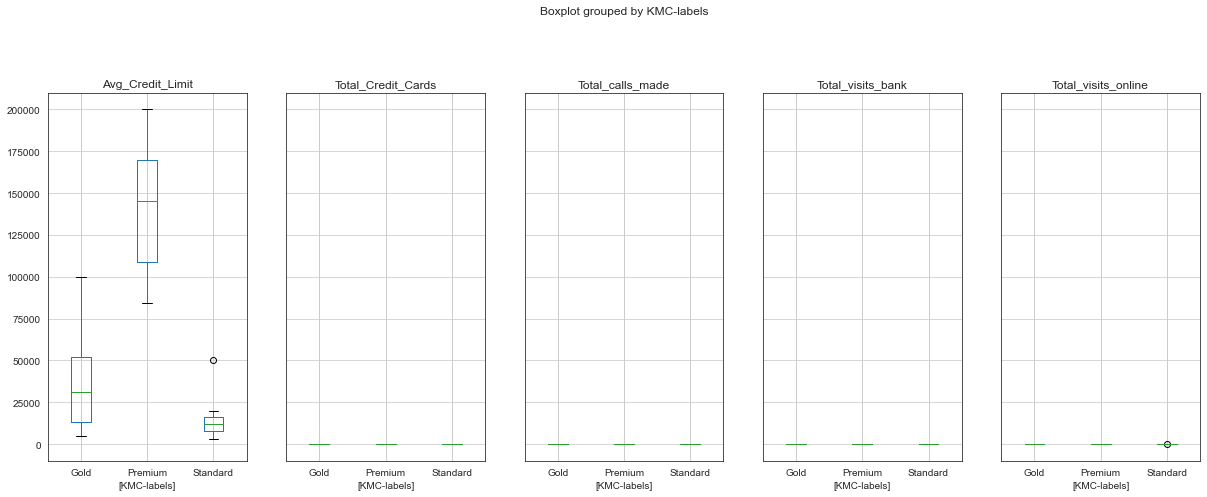

In [23]:
KMC_labeled.boxplot(by = 'KMC-labels',  layout=(2,5), figsize=(20, 15))

###### Values of Average Credit limit in dataset is very high compared to other attributes therfore boxplot cluster aanalysis for credit card count, Calls, online, branch visit colums is not visible. 

###### Copy the dataset to new datframe and drop Average credit limit to visualise data distibution in each cluser for other attributes (columns).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E30D9D4C0>,
      dtype=object)

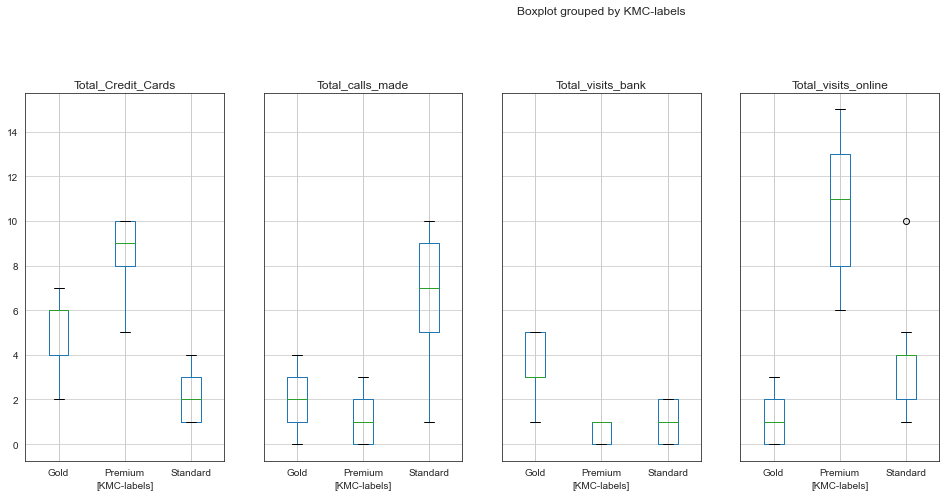

In [24]:
KMC_labeled2=KMC_labeled.copy()

KMC_labeled2.drop('Avg_Credit_Limit',axis=1, inplace=True)     # drop average Credit Card limit from dataframe

# Print boxplot of other columns
KMC_labeled2.boxplot(by = 'KMC-labels',  layout=(2,5), figsize=(20, 15))

#### k-mean cluster box plot Analysis : (k=3)
   ###### 1. Observed lots of overlapping in each attribute while using K = 4, which suggest 4 is not the right number of clusters
   ###### 2. using k = 3 provided much better results with minimal overlapping 
   ###### 3. Average Credit Limit : shows very little overlapping in cluster 0 & 1 , while cluster 1 & 2 are has clear seggrgation
   ###### 4. Majority of Data Point in Total Credit Cards count & Total Online visit show no overlapping
   ###### 5. Little overlap in cluster 1 & 2 customer for total call made attribute , & overlap in cluster 0 & 2  for total visits to bank
   
   ###### Use sillhoute Score to see the model performance

### 4. Hierarchical Clustering

Hierarchical clustering has two methods, Aglomerative , Divisive clustering. 

The agglomerative clustering is the most popular and common hierarchical clustering also known as Agglomerative Nesting (AGNES). The methods starts by considering each data point as a single cluster. In the next step the singleton clusters are merged into a bog cluster based on the similarity between them. The procedure is repeated until all the datapoints are merged into one big cluster. The procedure can be represented as hierarchy/tree of clusters.

The divisive clustering works completely opposite to agglomerative clustering and also known as Divisive Analysis (DIANA). The method starts from one big cluster considering all data points within it. In the next the big cluster is divided into the most heterogeneous two clusters. The procedure is repeated until each data point is in its own cluster. 

Agglomerative clustering is good choice to identify small sized clusters whereas divisive clustering is more effective in case of big size clusters. We have only 660 entries in dataset therefore use Agglomrative clustering. 

Steps Taken 

    1. Import Aglomarative clustering library from skleran
    2. Fit the scaled data in model using different linkages (single, complete, average, ward)
    3. Add the cluster label to original Dataframe
    4. Import Model Peformace measurment indices (cophenet, dendrogram, linkage)
    5. Boxplot the dataframe to analyse model performance
 

######  Import libraries from sklearn and scipy
    1. Import Agglomerative Clustering library
    2. Import cophenet, dendrogram, linkage, Pairdist to compare the model using different linkage methods

In [25]:
from sklearn.cluster import AgglomerativeClustering

# fit the model using scaled data and cluster count = 3  (default is 2)

HC_Model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
HC_Model.fit(df1_z)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [26]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist       #Pairwise distribution between data points


In [27]:
HC_labeled=df1.copy()
HC_labeled['HC-labels'] = HC_Model.labels_
HC_labeled.head(10)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   
5             20000                   3                  0   
6            100000                   5                  0   
7             15000                   3                  0   
8              5000                   2                  0   
9              3000                   4                  0   

   Total_visits_online  Total_calls_made  HC-labels  
0                    1                 0          0  
1                   10                 9          2  
2                    3                 4          0  
3                    1                 4          0  
4                   12                 3          1  
5                    1                 8          2  
6                   11                 2          1  
7                    1                 1          2  
8                    2                 2          2  
9                    1                 7          2

In [28]:
# Add the cluster label to categories Standatd,Gold,Premium

HC_labeled['HC-labels']=HC_labeled['HC-labels'].astype(str)
HC_labeled['HC-labels'].replace({"0": "Gold", "1": "Premium", "2": "Standard"}, inplace=True)
HC_labeled.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made HC-labels  
0                    1                 0      Gold  
1                   10                 9  Standard  
2                    3                 4      Gold  
3                    1                 4      Gold  
4                   12                 3   Premium

In [29]:
# check the Number of enteries in each cluster 

HC_labeled.groupby(["HC-labels"]).count()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
HC-labels                                                            
Gold                    387                 387                387   
Premium                  50                  50                 50   
Standard                223                 223                223   

           Total_visits_online  Total_calls_made  
HC-labels                                         
Gold                       387               387  
Premium                     50                50  
Standard                   223               223

In [30]:
# check the Mean of every cluster for colums

HC_labeled.groupby(["HC-labels"]).mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
HC-labels                                                            
Gold           33713.178295            5.511628           3.485788   
Premium       141040.000000            8.740000           0.600000   
Standard       12197.309417            2.403587           0.928251   

           Total_visits_online  Total_calls_made  
HC-labels                                         
Gold                  0.984496          2.005168  
Premium              10.900000          1.080000  
Standard              3.560538          6.883408

###### cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram, value closer to  1, indicates better clustering

##### A dendrogram is a pictorial way to visualize hierarchical clustering. It is mainly used to show the outcome of hierarchical clustering a tree like diagram that records the sequences of merges and splits

##### 4.1 Linkage Method : Single, Cophenetic Coeff and Dandogram

In [31]:
#Cophenetic Coefficient
LM1 = linkage(df1_z, metric='euclidean', method='single')
c1, coph_dists = cophenet(LM1, pdist(df1_z))
c1

0.7391220243806552

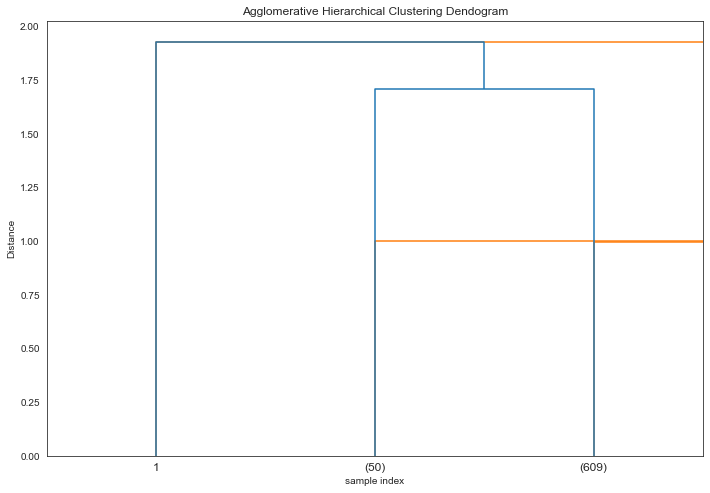

In [32]:
# Plotting Dandogram

plt.figure(figsize=(10, 7))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(LM1, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout() 

dendrogram(LM1,truncate_mode='lastp', p=3,) # show only the last p merged clusters
plt.show()

##### 4.2 Linkage Method : average, Cophenetic Coeff and Dandogram

In [33]:
#Cophenetic Coefficient
LM2 = linkage(df1_z, metric='euclidean', method='average')
c2, coph_dists = cophenet(LM2, pdist(df1_z))
c2

0.8977080867389372

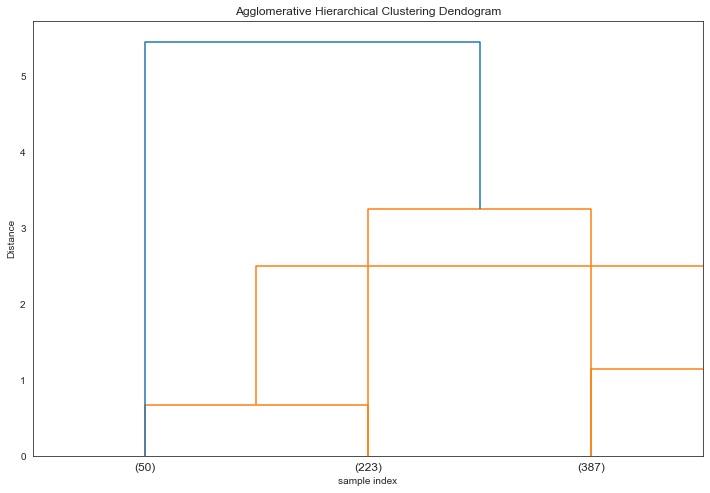

In [34]:
# Plotting Dandogram

plt.figure(figsize=(10, 7))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(LM2, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout() 

dendrogram(LM2,truncate_mode='lastp', p=3,) # show only the last p merged clusters
plt.show()

##### 4.3 Linkage Method : complete, Cophenetic Coeff and Dandogram

In [35]:
#Cophenetic Coefficient
LM3 = linkage(df1_z, metric='euclidean', method='complete')
c3, coph_dists = cophenet(LM3, pdist(df1_z))
c3

0.8599730607972423

In [36]:
# Plotting Dandogram

plt.figure(figsize=(10, 7))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(LM3, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout() 
dendrogram(LM3,truncate_mode='lastp', p=3,) # show only the last p merged clusters
plt.show()

##### 4.4 Linkage Method : ward, Cophenetic Coeff and Dandogram

In [37]:
#Cophenetic Coefficient
LM4 = linkage(df1_z, metric='euclidean', method='ward')
c4, coph_dists = cophenet(LM4, pdist(df1_z))
c4

0.7415156284827493

In [38]:
# Plotting Dandogram

plt.figure(figsize=(10, 7))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(LM4, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout() 


#### 4.5 Analyse Hierarchical clusters using box plot

1. Values of Average Credit limit in dataset is very high compared to other attributes therfore boxplot cluster aanalysis for credit card count, Calls, online, branch visit colums is not visible.
2. Copy the dataset to new datframe and drop Average credit limit to visualise data distibution in each cluser for other attributes (columns).

In [39]:
HC_labeled.boxplot(by = 'HC-labels',  layout=(2,5), figsize=(20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E2A252730>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E28B0C160>,
      dtype=object)

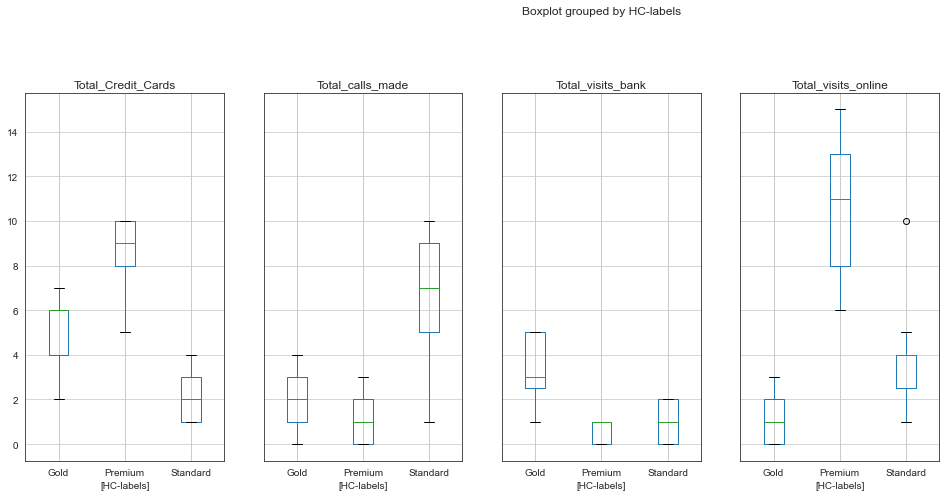

In [40]:
HC_labeled2=HC_labeled.copy()

HC_labeled2.drop('Avg_Credit_Limit',axis=1, inplace=True)     # drop average Credit Card limit from dataframe

# Print boxplot of other columns
HC_labeled2.boxplot(by = 'HC-labels',  layout=(2,5), figsize=(20, 15))

### Analysis

###### 1. Comparing the Cophenitic coefficient using different linkage, averege Linkage method provides the best cophentic score, therfore used in 
###### 2. Single (minimal Linkage) method provides the worst clustering
###### 3. Truncating the dandogram provides best visualization of clusters, dislaying the numbers and datapoint in each cluster, overlapping. 


#### 5. Calculate Average silhouette score for both methods

1. Silhouette Coefficient is calculated using the mean intra-cluster distance (``a``) and the mean nearest-cluster distance (``b``) for each sample.

2. This function returns the mean Silhouette Coefficient over all samples.To obtain the values for each sample, use func:`silhouette_samples`.

###### The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [41]:
# Import silhoutte Score from sklern
from sklearn.metrics import silhouette_score

##### 5.1 silhouette_score for K-Means Clustering

In [42]:
silhouette_score(df1_z,KMC.labels_)

0.5157182558881063

##### 5.2 silhouette_score for Hierararchical Clustering

In [43]:
# Calculate Avg Silhoutte Score for Hierarchical Clustering

silhouette_score(df1_z,HC_Model.labels_)

0.515922432650965

##### Both Clustering method provide almost same Sillhoute score with cluster count 3 

##### 6. Compare K mean Clusters with Hierarchical Cluster

1. Merge the Dataframe to have Hierarchical cluster and K Mean Cluster prediction
2. Compare the K-mean & Hierarchical clusters 
3. Print count plot to check entries per cluster
4. Print the 5 point summary of clsusters to understand the customer segmentation wiin cluster

In [44]:
KMH_labeled = KMC_labeled.copy()
KMH_labeled['HC-labels']=HC_labeled['HC-labels']
KMH_labeled.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made KMC-labels HC-labels  
0                    1                 0       Gold      Gold  
1                   10                 9   Standard  Standard  
2                    3                 4       Gold      Gold  
3                    1                 4       Gold      Gold  
4                   12                 3    Premium   Premium

In [45]:
# Compare the Clusters of both methods

KMH_labeled['Compare']=KMH_labeled['KMC-labels']==KMH_labeled['HC-labels']
KMH_labeled.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made KMC-labels HC-labels  Compare  
0                    1                 0       Gold      Gold     True  
1                   10                 9   Standard  Standard     True  
2                    3                 4       Gold      Gold     True  
3                    1                 4       Gold      Gold     True  
4                   12                 3    Premium   Premium     True

In [46]:
KMH_labeled['Compare'].value_counts()

True     659
False      1
Name: Compare, dtype: int64

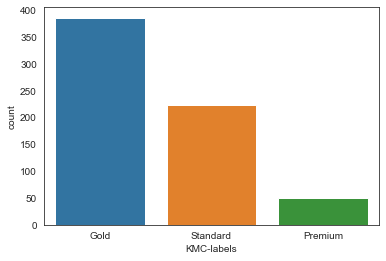

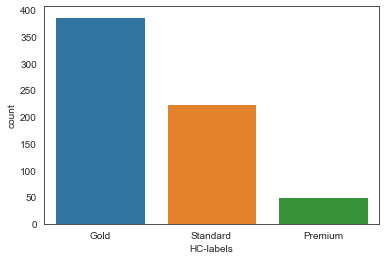

In [47]:
for column_item in ["KMC-labels", "HC-labels"]:
    sns.countplot(KMH_labeled[column_item])

    plt.show()

In [48]:
KMH_labeled.groupby(["KMC-labels"]).describe().T.round(1) 

KMC-labels                     Gold   Premium  Standard
Avg_Credit_Limit    count     386.0      50.0     224.0
                    mean    33782.4  141040.0   12174.1
                    std     22169.5   34457.9    5249.0
                    min      5000.0   84000.0    3000.0
                    25%     13000.0  108750.0    8000.0
                    50%     31000.0  145500.0   12000.0
                    75%     52000.0  170000.0   16000.0
                    max    100000.0  200000.0   50000.0
Total_Credit_Cards  count     386.0      50.0     224.0
                    mean        5.5       8.7       2.4
                    std         1.1       1.3       1.1
                    min         2.0       5.0       1.0
                    25%         4.0       8.0       1.0
                    50%         6.0       9.0       2.0
                    75%         6.0      10.0       3.0
                    max         7.0      10.0       4.0
Total_visits_bank   count     386.0      50.0     224.0
                    mean        3.5       0.6       0.9
                    std         1.1       0.5       0.8
                    min         1.0       0.0       0.0
                    25%         3.0       0.0       0.0
                    50%         3.0       1.0       1.0
                    75%         5.0       1.0       2.0
                    max         5.0       1.0       2.0
Total_visits_online count     386.0      50.0     224.0
                    mean        1.0      10.9       3.6
                    std         0.9       2.9       1.2
                    min         0.0       6.0       1.0
                    25%         0.0       8.0       2.0
                    50%         1.0      11.0       4.0
                    75%         2.0      13.0       4.0
                    max         3.0      15.0      10.0
Total_calls_made    count     386.0      50.0     224.0
                    mean        2.0       1.1       6.9
                    std         1.4       0.9       2.0
                    min         0.0       0.0       1.0
                    25%         1.0       0.0       5.0
                    50%         2.0       1.0       7.0
                    75%         3.0       2.0       9.0
                    max         4.0       3.0      10.0

In [49]:
KMH_labeled.groupby(['HC-labels']).describe().T.round(1) 

HC-labels                      Gold   Premium  Standard
Avg_Credit_Limit    count     387.0      50.0     223.0
                    mean    33713.2  141040.0   12197.3
                    std     22182.5   34457.9    5249.3
                    min      5000.0   84000.0    3000.0
                    25%     13000.0  108750.0    8000.0
                    50%     31000.0  145500.0   12000.0
                    75%     52000.0  170000.0   16000.0
                    max    100000.0  200000.0   50000.0
Total_Credit_Cards  count     387.0      50.0     223.0
                    mean        5.5       8.7       2.4
                    std         1.1       1.3       1.1
                    min         2.0       5.0       1.0
                    25%         4.0       8.0       1.0
                    50%         6.0       9.0       2.0
                    75%         6.0      10.0       3.0
                    max         7.0      10.0       4.0
Total_visits_bank   count     387.0      50.0     223.0
                    mean        3.5       0.6       0.9
                    std         1.1       0.5       0.8
                    min         1.0       0.0       0.0
                    25%         2.5       0.0       0.0
                    50%         3.0       1.0       1.0
                    75%         5.0       1.0       2.0
                    max         5.0       1.0       2.0
Total_visits_online count     387.0      50.0     223.0
                    mean        1.0      10.9       3.6
                    std         0.9       2.9       1.2
                    min         0.0       6.0       1.0
                    25%         0.0       8.0       2.5
                    50%         1.0      11.0       4.0
                    75%         2.0      13.0       4.0
                    max         3.0      15.0      10.0
Total_calls_made    count     387.0      50.0     223.0
                    mean        2.0       1.1       6.9
                    std         1.4       0.9       2.0
                    min         0.0       0.0       1.0
                    25%         1.0       0.0       5.0
                    50%         2.0       1.0       7.0
                    75%         3.0       2.0       9.0
                    max         4.0       3.0      10.0

#### Results : 

1. Both clustering methods provides almost identical cluster segmentation.
2. Customer in Premium segment clusters exactly match
3. only 1 customer mismatch in Standard & Gold Segments

#### 7. Analysis the clusters formed 
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

###### 7.1 - Customers segmented in three clustors. 
223 customers in standard , 387 in Gold, 50 in Premium Segment

###### 7.2 How these clusters different from each other 


###### Segment 1 "Standard" 
1. There are 223 customers in this segment
2. Average credit limit in range of 3K to 50 K. 75% of customers limit less than 16K.
3. Majority of the customers has less than 3 credit cards from bank.
4. They didn't preffer to visit branch, calling the bank is their most preffered communication

###### Segment 2 "Gold 
1. There are 387 customers in this segment
2. Average credit limit in range of 5K to 100K. Majority of customer has limit more than 31K.
3. Majority of the customers has more than 5 credit cards from bank.
4. They  preffer to visit branch for service insted of Online or call to bank

###### Segment 3 " Premium 
1. There are 50 customers in this segment
2. Average credit limit in range of 84K to 200K. with average limite more than 140K.
3. Majority of the customers has ~ 9 credit cards from bank.
4. Online Banking is their most preffered comminication channel, than Phone banking. they hardly visit the branch for service

There is slight overlapping in customer segment by avergae credit Limit

#### 7.3 Recommendations

1. Customer in Standard segment preffer phone banking, annouce them more offer and promtions over on call. Offer more credit cards / banking sevices  to upsale.

2. Customers in Gold segment preffer to visit branch, to sever them better help them registering for online banking, arrange demo durign next visit.

5. Customer in premium segment are most valuable customers, assign them relationship manager, do mothly calls to these customer to undertand their needs and offer them prodcts tailored to their requirement. 

To server better announce customer to use online banking to avoid waiting in Q or banking during nonworking hours. 